In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress
from HandyFunctions import calc_scale_height, convert_rprs_to_rpJ, calc_scale_height_error
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [12]:
## WASP-96 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw96= np.load('output_arrays/synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw96, tAw96, terrAw96 = resAw96['fasyms'], resAw96['tdiff_seconds'], resAw96['tdiff_err_seconds']
resBw96 = np.load('output_arrays/synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw96, tBw96, terrBw96 = resBw96['fasyms'], resBw96['tdiff_seconds'], resBw96['tdiff_err_seconds']
resCw96 = np.load('output_arrays/synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw96, tCw96, terrCw96 = resCw96['fasyms'], resCw96['tdiff_seconds'], resCw96['tdiff_err_seconds']
fw96, tw96, terrw96 = np.concatenate((fAw96, fBw96, fCw96)), np.concatenate((tAw96, tBw96, tCw96)), np.concatenate((terrAw96, terrBw96, terrCw96))

## WASP-107 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw107= np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw107, tAw107, terrAw107 = resAw107['fasyms'], resAw107['tdiff_seconds'], resAw107['tdiff_err_seconds']
resBw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw107, tBw107, terrBw107 = resBw107['fasyms'], resBw107['tdiff_seconds'], resBw107['tdiff_err_seconds']
resCw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw107, tCw107, terrCw107 = resCw107['fasyms'], resCw107['tdiff_seconds'], resCw107['tdiff_err_seconds']
fw107, tw107, terrw107 = np.concatenate((fAw107, fBw107, fCw107)), np.concatenate((tAw107, tBw107, tCw107)),np.concatenate((terrAw107, terrBw107, terrCw107))

## GJ-1214 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAgj1214= np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAgj1214, tAgj1214, terrAgj1214 = resAgj1214['fasyms'], resAgj1214['tdiff_seconds'], resAgj1214['tdiff_err_seconds']
resBgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBgj1214, tBgj1214, terrBgj1214 = resBgj1214['fasyms'], resBgj1214['tdiff_seconds'], resBgj1214['tdiff_err_seconds']
resCgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCgj1214, tCgj1214, terrCgj1214 = resCgj1214['fasyms'], resCgj1214['tdiff_seconds'], resCgj1214['tdiff_err_seconds']
fgj1214, tgj1214, terrgj1214 = np.concatenate((fAgj1214, fBgj1214, fCgj1214)), np.concatenate((tAgj1214, tBgj1214, tCgj1214)), np.concatenate((terrAgj1214, terrBgj1214, terrCgj1214))
 
## WASP-39 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw39= np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw39, tAw39, terrAw39 = resAw39['fasyms'], resAw39['tdiff_seconds'], resAw39['tdiff_err_seconds']
resBw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw39, tBw39, terrBw39 = resBw39['fasyms'], resBw39['tdiff_seconds'], resBw39['tdiff_err_seconds']
resCw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw39, tCw39, terrCw39 = resCw39['fasyms'], resCw39['tdiff_seconds'], resCw39['tdiff_err_seconds']
fw39, tw39, terrw39 = np.concatenate((fAw39, fBw39, fCw39)), np.concatenate((tAw39, tBw39, tCw39)),np.concatenate((terrAw39, terrBw39, terrCw39))
    
## WASP-80 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw80= np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw80, tAw80, terrAw80 = resAw80['fasyms'], resAw80['tdiff_seconds'], resAw80['tdiff_err_seconds']
resBw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw80, tBw80, terrBw80 = resBw80['fasyms'], resBw80['tdiff_seconds'], resBw80['tdiff_err_seconds']
resCw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw80, tCw80, terrCw80 = resCw80['fasyms'], resCw80['tdiff_seconds'], resCw80['tdiff_err_seconds']
fw80, tw80, terrw80 = np.concatenate((fAw80, fBw80, fCw80)), np.concatenate((tAw80, tBw80, tCw80)),np.concatenate((terrAw80, terrBw80, terrCw80))    
    
## Limb darkening coefficient cases
u1A, u2A= 0.1777 , 0.2952
u1B, u2B = 0.25, 0.45
u1C, u2C = 0.6, 0.2952

# Prop t0 uncertainties after 1,000 transits
propw96 = 1.235466*60. #[s]
propw107 = 4.341546*60.
propgj1214 = 0.209944*60.
propw39 = 4.979340*60.
propw80 = 0.279597*60.

## computing the scale heights as done in the simulations
M_w96, T_w96, RpRs_w96, Rs_w96, mu_w96 = 0.49, 1285., 0.1186, 1.15, 2.3
Merr_w96, Terr_w96, RpRserr_w96, Rserr_w96, muerr_w96 = 0.04, 40., 0.0017, 0.03, 0.25
Rp1_w96 = convert_rprs_to_rpJ(RpRs_w96, Rs_w96)
Rp1err_w96 = 9.73116*np.sqrt((Rs_w96**2 * RpRserr_w96**2) + (RpRs_w96**2 * Rserr_w96**2)) # 9.7... = Rsun -> Rjup conversion
H_w96 = calc_scale_height(T_w96, M_w96, Rp1_w96, mu_w96)
Herr_w96 = calc_scale_height_error(T_w96, M_w96, Rp1_w96, mu_w96, Terr_w96, Merr_w96, Rp1err_w96, muerr_w96)

M_w107, T_w107, RpRs_w107, Rs_w107, mu_w107 = 0.096, 770., 0.14434, 0.73, 2.3
Merr_w107, Terr_w107, RpRserr_w107, Rserr_w107, muerr_w107 = 0.005, 60., 0.00018, 0.15, 0.25
Rp1_w107 = convert_rprs_to_rpJ(RpRs_w107, Rs_w107)
Rp1err_w107 = 0.02 # using this one is inflated by Rs err -> 9.73116*np.sqrt((Rs_w107**2 * RpRserr_w107**2) + (RpRs_w107**2 * Rserr_w107**2))
H_w107 = calc_scale_height(T_w107, M_w107, Rp1_w107, mu_w107)
Herr_w107 = calc_scale_height_error(T_w107, M_w107, Rp1_w107, mu_w107, Terr_w107, Merr_w107, Rp1err_w107, muerr_w107)

M_gj1214, T_gj1214, RpRs_gj1214, Rs_gj1214, mu_gj1214 = 0.0257, 596., 0.1160, 0.215, 2.3
Merr_gj1214, Terr_gj1214, RpRserr_gj1214, Rserr_gj1214, muerr_gj1214 = 0.0014, 19., 0.0005, 0.008, 0.25
Rp1_gj1214 = convert_rprs_to_rpJ(RpRs_gj1214, Rs_gj1214)
Rp1err_gj1214 = 9.73116*np.sqrt((Rs_gj1214**2 * RpRserr_gj1214**2) + (RpRs_gj1214**2 * Rserr_gj1214**2))
H_gj1214 = calc_scale_height(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214)
Herr_gj1214 = calc_scale_height_error(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214, Terr_gj1214, Merr_gj1214, Rp1err_gj1214, muerr_gj1214)

M_w39, T_w39, RpRs_w39, Rs_w39, mu_w39 = 0.281, 1166., 0.1457, 0.928, 2.3
Merr_w39, Terr_w39, RpRserr_w39, Rserr_w39, muerr_w39 = 0.032, 14., 0.0015, 0.03, 0.25
Rp1_w39 = convert_rprs_to_rpJ(RpRs_w39, Rs_w39)
Rp1err_w39 = 9.73116*np.sqrt((Rs_w39**2 * RpRserr_w39**2) + (RpRs_w39**2 * Rserr_w39**2))
H_w39 = calc_scale_height(T_w39, M_w39, Rp1_w39, mu_w39)
Herr_w39 = calc_scale_height_error(T_w39, M_w39, Rp1_w39, mu_w39, Terr_w39, Merr_w39, Rp1err_w39, muerr_w39)

## checking WASP-80 b's scale height calculation
M_w80, T_w80, RpRs_w80, Rs_w80, mu_w80 = 0.538, 825., 0.17137, 0.605, 2.3
Merr_w80, Terr_w80, RpRserr_w80, Rserr_w80, muerr_w80 = 0.035, 19., 0.00039, 0.048, 0.25
Rp1_w80 = convert_rprs_to_rpJ(RpRs_w80, Rs_w80)
Rp1err_w80 = 9.73116*np.sqrt((Rs_w80**2 * RpRserr_w80**2) + (RpRs_w80**2 * Rserr_w80**2))
H_w80 = calc_scale_height(T_w80, M_w80, Rp1_w80, mm=mu_w80)
Herr_w80 = calc_scale_height_error(T_w80, M_w80, Rp1_w80, mu_w80, Terr_w80, Merr_w80, Rp1err_w80, muerr_w80)

Teqs = np.array([T_gj1214, T_w80, T_w96, T_w39, T_w107])
radii1 = np.array([Rp1_gj1214, Rp1_w80, Rp1_w96, Rp1_w39, Rp1_w107])
masses = np.array([M_gj1214, M_w80, M_w96, M_w39, M_w107])
scaleheights = np.array([H_gj1214, H_w80, H_w96, H_w39, H_w107])
scaleheight_errs = np.array([Herr_gj1214, Herr_w80, Herr_w96, Herr_w39, Herr_w107])

labels = np.array(['GJ-1214 b', 'WASP-80 b', 'WASP-96 b', 'WASP-39 b', 'WASP-107 b'])

In [13]:
# np.savez(output_arr_name,
#         fasyms=fasym_arr,
#         tdiff_seconds=t0_diff_seconds_arr, tdiff_err_seconds=t0_diff_seconds_err_arr,
#         chi2red_homog=chi2red_homog_arr, chi2red_asym=chi2red_asym_arr)

## Looking at y=t, x=R

In [14]:
# ## Plotting the full f_asym vs. t diff data
# fig, ax = plt.subplots(figsize=(10,6))

# # W-107 b
# ax.axhline(-propw107, ls='solid', c='black', lw=2, alpha=0.5)
# ax.errorbar(fAw107, tAw107, terrAw107, ls='solid', marker='o', ms=5, c='red')
# ax.errorbar(fBw107, tBw107, terrBw107, ls='solid', marker='o', ms=5, c='orange')
# ax.errorbar(fCw107, tCw107, terrCw107, ls='solid', marker='o', ms=5, c='teal')
# # W-39 b
# ax.axhline(-propw39, ls='--', c='black', lw=2, alpha=0.5)
# ax.errorbar(fAw39, tAw39, terrAw39, ls='--', marker='s', ms=5, c='red')
# ax.errorbar(fBw39, tBw39, terrBw39, ls='--', marker='s', ms=5, c='orange')
# ax.errorbar(fCw39, tCw39, terrCw39, ls='--', marker='s', ms=5, c='teal')
# # W-96 b
# ax.axhline(-propw96, ls='dotted', c='black', lw=2, alpha=0.5)
# ax.errorbar(fAw96, tAw96, terrAw96, ls='dotted', marker='d', ms=5, c='red')
# ax.errorbar(fBw96, tBw96, terrBw96, ls='dotted', marker='d', ms=5, c='orange')
# ax.errorbar(fCw96, tCw96, terrCw96, ls='dotted', marker='d', ms=5, c='teal')
# # W-80 b
# ax.axhline(-propw80, ls='dashdot', c='black', lw=2, alpha=0.5)
# ax.errorbar(fAw80, tAw80, terrAw80, ls='dashdot', marker='^', ms=5, c='red')
# ax.errorbar(fBw80, tBw80, terrBw80, ls='dashdot', marker='^', ms=5, c='orange')
# ax.errorbar(fCw80, tCw80, terrCw80, ls='dashdot', marker='^', ms=5, c='teal')
# # gj-1214 b
# ax.axhline(-propgj1214, ls=(5,(6,6)), c='black', lw=2, alpha=0.5)
# ax.errorbar(fAgj1214, tAgj1214, terrAgj1214, ls=(5,(6,6)), marker='x', ms=5, c='red')
# ax.errorbar(fBgj1214, tBgj1214, terrBgj1214, ls=(5,(6,6)), marker='x', ms=5, c='orange')
# ax.errorbar(fCgj1214, tCgj1214, terrCgj1214, ls=(5,(6,6)), marker='x', ms=5, c='teal')

# custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
#                        Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
#                        Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
#                        Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
#                        Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
#                        Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
#                        Line2D([0],[0], color='teal', lw=3, ls='solid'), Line2D([0],[0], c='black', lw=2, ls='solid', alpha=0.5)
#                       ]
# custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
#                        '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C), 'Propagated $\sigma_{t_0}$']
# ax.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)
# ax.set(ylim=(10, -260))
# #ax.set(xlim=(0, 25))
# ax.set(xlabel='Intrinsic $\Delta R_p$ of simulated data [scale heights] \n Smallest resolvable limb asymmetry [$\Delta R_p$ in scale heights]', 
#        ylabel='Shift in $t_0$ by uniform limb model [s] \n Transit timing uncertainty $\sigma_{t_0}$ [s]')
# ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=.5, fontsize=9)

# plt.show()

- Different LDC lines, for a given planet, are nearly identical
- Each planet has a different family of lines, primarily differentiated by their slopes
- Each relationship is linear up until y = the propagated uncertainty after which it flattens. This is because the propagated uncertainty limits the amount you can shift (via Bayesian prior enforcement). 
- Given a specific uncertainty (i.e. a y-value), you generally cannot resolve asymmetries (i.e. x-values) smaller than where your planet's line meets that y-value. 

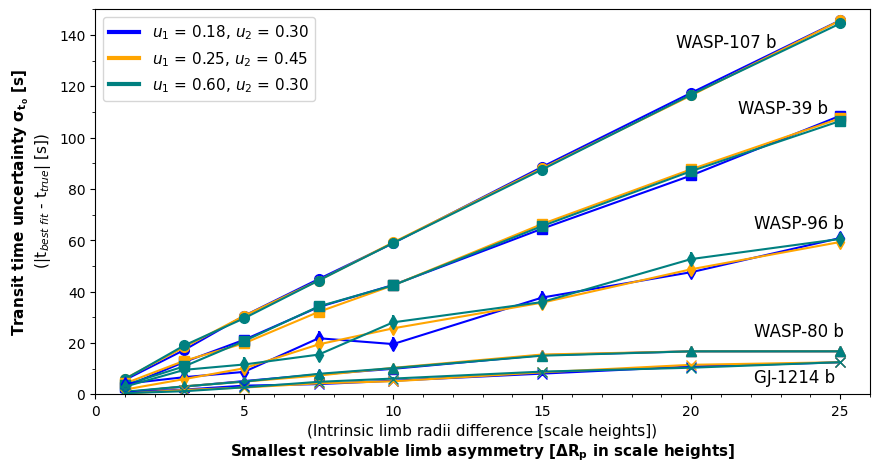

In [36]:
## Plotting the full f_asym vs. t diff data
fig, ax = plt.subplots(figsize=(10,5))

cutoff = 8

## W-107 b
#ax.axhline(propw107, ls='solid', c='black', lw=2, alpha=0.5)
ax.text(0.75, 0.9, 'WASP-107 b', c='black', fontsize=12, transform=ax.transAxes)
ax.errorbar(fAw107[:cutoff], abs(tAw107)[:cutoff], terrAw107[:cutoff], ls='solid', marker='o', ms=7, c='blue')
ax.errorbar(fBw107[:cutoff], abs(tBw107)[:cutoff], terrBw107[:cutoff], ls='solid', marker='o', ms=7, c='orange')
ax.errorbar(fCw107[:cutoff], abs(tCw107)[:cutoff], terrCw107[:cutoff], ls='solid', marker='o', ms=7, c='teal')
## W-39 b
#ax.axhline(propw39, ls='--', c='black', lw=2, alpha=0.5)
ax.text(0.83, 0.73, 'WASP-39 b', c='black', fontsize=12, transform=ax.transAxes)
ax.errorbar(fAw39[:cutoff], abs(tAw39)[:cutoff], terrAw39[:cutoff], ls='solid', marker='s', ms=7, c='blue')
ax.errorbar(fBw39[:cutoff], abs(tBw39)[:cutoff], terrBw39[:cutoff], ls='solid', marker='s', ms=7, c='orange')
ax.errorbar(fCw39[:cutoff], abs(tCw39)[:cutoff], terrCw39[:cutoff], ls='solid', marker='s', ms=7, c='teal')
## W-96 b
#ax.axhline(propw96, ls='dotted', c='black', lw=2, alpha=0.5)
ax.text(0.85, 0.43, 'WASP-96 b', c='black', fontsize=12, transform=ax.transAxes)
ax.errorbar(fAw96[:cutoff], abs(tAw96)[:cutoff], terrAw96[:cutoff], ls='solid', marker='d', ms=7, c='blue')
ax.errorbar(fBw96[:cutoff], abs(tBw96)[:cutoff], terrBw96[:cutoff], ls='solid', marker='d', ms=7, c='orange')
ax.errorbar(fCw96[:cutoff], abs(tCw96)[:cutoff], terrCw96[:cutoff], ls='solid', marker='d', ms=7, c='teal')
## W-80 b
#ax.axhline(propw80, ls='dashdot', c='black', lw=2, alpha=0.5)
ax.text(0.85, 0.15, 'WASP-80 b', c='black', fontsize=12, transform=ax.transAxes)
ax.errorbar(fAw80[:cutoff], abs(tAw80)[:cutoff], terrAw80[:cutoff], ls='solid', marker='^', ms=7, c='blue')
ax.errorbar(fBw80[:cutoff], abs(tBw80)[:cutoff], terrBw80[:cutoff], ls='solid', marker='^', ms=7, c='orange')
ax.errorbar(fCw80[:cutoff], abs(tCw80)[:cutoff], terrCw80[:cutoff], ls='solid', marker='^', ms=7, c='teal')
## gj-1214 b
#ax.axhline(propgj1214, ls=(5,(6,6)), c='black', lw=2, alpha=0.5)
ax.text(0.85, 0.03, 'GJ-1214 b', c='black', fontsize=12, transform=ax.transAxes)
ax.errorbar(fAgj1214[:cutoff], abs(tAgj1214)[:cutoff], terrAgj1214[:cutoff], ls='solid', marker='x', ms=7, c='blue')
ax.errorbar(fBgj1214[:cutoff], abs(tBgj1214)[:cutoff], terrBgj1214[:cutoff], ls='solid', marker='x', ms=7, c='orange')
ax.errorbar(fCgj1214[:cutoff], abs(tCgj1214)[:cutoff], terrCgj1214[:cutoff], ls='solid', marker='x', ms=7, c='teal')

custom_legend_lines = [
                       Line2D([0],[0], color='blue', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')#, Line2D([0],[0], c='black', lw=2, ls='solid', alpha=0.5)
                      ]
custom_legend_labels = ['$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C), 'Propagated $\sigma_{t_0}$']
#ax.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)
ax.set(ylim=(0, 150))
ax.set(xlim=(0, 26))
# ax.set_xlabel('Mimicked Limb Asymmetry [$\Delta R_p$ in units scale heights]', fontsize=12)
# ax.set_ylabel('|Transit midpoint time variation [s]|', fontsize=12)
ax.set_xlabel('(Intrinsic limb radii difference [scale heights])\n'+r'$\bf{Smallest \ resolvable \ limb \ asymmetry \  [\Delta R_p \ in \ scale \ heights]}$', fontsize=11)
ax.set_ylabel(r'$\bf{Transit \ time \ uncertainty \ \sigma_{t_0} \ [s]}$'+'\n (|t$_{best~fit}$ - t$_{true}$| [s])', fontsize=11)
ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=.5, fontsize=11)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.savefig('analysis_figures/tRplot.png', dpi=400, bbox_inches='tight')
plt.show()

In [37]:
# Fitting each planet's combined line family
def line_fit(xdata, ydata):
    fit = linregress(xdata, ydata)
    return fit.slope, fit.intercept, fit.stderr, fit.intercept_stderr

def check_fit(xdata, ydata, yerrs, prop=-99, title=-99):
    fitparams = line_fit(xdata, ydata)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(xdata, ydata, yerrs, ls='--', marker='o', c='black', ms=7)
    x_plot = np.linspace(min(xdata), max(xdata), 15)
    y_plot = fitparams[0]*x_plot + fitparams[1]
    ax.plot(x_plot, y_plot, c='red', zorder=5, lw=2)
    ax.text(0.65, 0.75, 'Slope = %f +/- %f'%(fitparams[0], fitparams[2]), transform=ax.transAxes)
    ax.text(0.65, 0.65, 'Intcpt = %f +/- %f'%(fitparams[1], fitparams[3]), transform=ax.transAxes)
    
    if prop != -99:
        ax.axhline(-prop, c='black', ls='dotted', alpha=0.3)
    if title != -99:
        plt.title(title)
    
    plt.show()

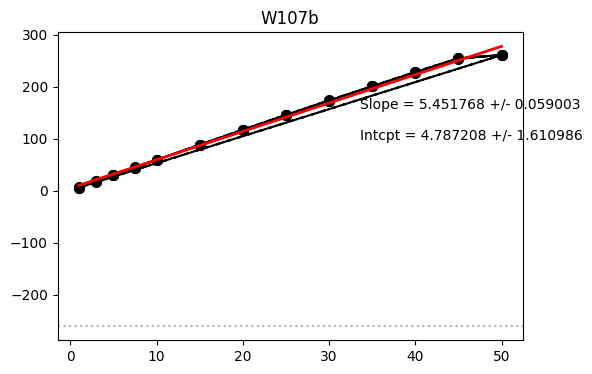

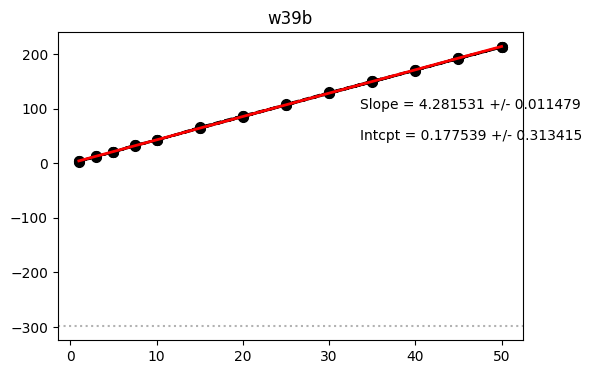

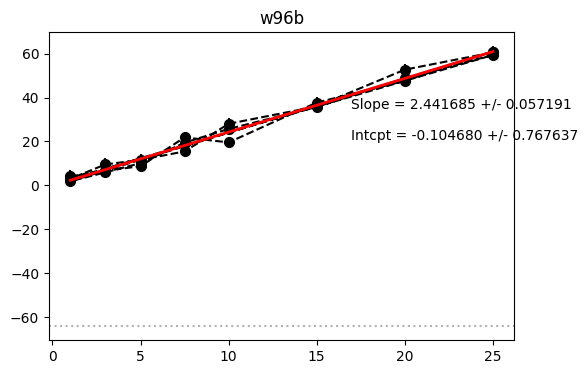

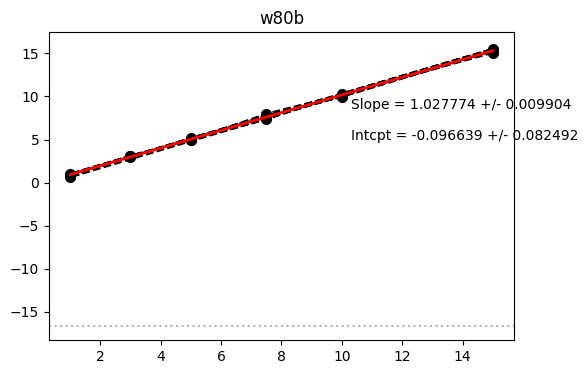

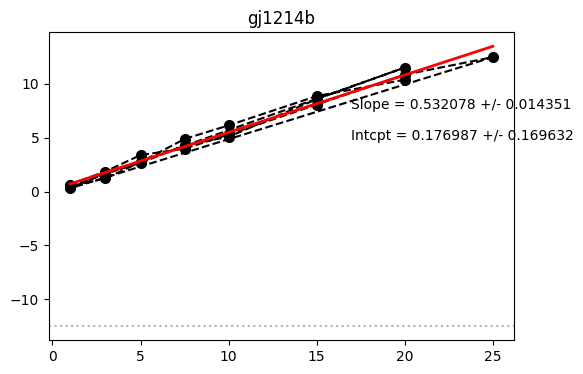

In [38]:
# Fitting each planet's combined line family
idxs1_w107 = np.where(abs(tw107) <= propw107)
slope1_w107, intcpt1_w107, slope1err_w107, intcpt1err_w107 = line_fit(fw107[idxs1_w107], abs(tw107[idxs1_w107]))
check_fit(fw107[idxs1_w107], abs(tw107[idxs1_w107]), terrw107[idxs1_w107], propw107, 'W107b')

idxs1_w39 = np.where(abs(tw39) <= propw39)
slope1_w39, intcpt1_w39, slope1err_w39, intcpt1err_w39 = line_fit(fw39[idxs1_w39], abs(tw39[idxs1_w39]))
check_fit(fw39[idxs1_w39], abs(tw39[idxs1_w39]), terrw39[idxs1_w39], propw39, 'w39b')

idxs1_w96 = np.where(abs(tw96) <= propw96-10)
slope1_w96, intcpt1_w96, slope1err_w96, intcpt1err_w96 = line_fit(fw96[idxs1_w96], abs(tw96[idxs1_w96]))
check_fit(fw96[idxs1_w96], abs(tw96[idxs1_w96]), terrw96[idxs1_w96], propw96-10, 'w96b')

idxs1_w80 = np.where(abs(tw80) <= propw80-0.1)
slope1_w80, intcpt1_w80, slope1err_w80, intcpt1err_w80 = line_fit(fw80[idxs1_w80], abs(tw80[idxs1_w80]))
check_fit(fw80[idxs1_w80], abs(tw80[idxs1_w80]), terrw80[idxs1_w80], propw80-0.1, 'w80b')

idxs1_gj1214 = np.where(abs(tgj1214) <= propgj1214-0.1)
slope1_gj1214, intcpt1_gj1214, slope1err_gj1214, intcpt1err_gj1214 = line_fit(fgj1214[idxs1_gj1214], abs(tgj1214[idxs1_gj1214]))
check_fit(fgj1214[idxs1_gj1214], abs(tgj1214[idxs1_gj1214]), terrgj1214[idxs1_gj1214], propgj1214-0.1, 'gj1214b')

slopes1 = np.array([slope1_gj1214, slope1_w80, slope1_w96, slope1_w39, slope1_w107])
slopes1err = np.array([slope1err_gj1214, slope1err_w80, slope1err_w96, slope1err_w39, slope1err_w107])

slopeH1, intcptH1, slopeerrH1, intcpterrH1 = line_fit(scaleheights, slopes1)

In [39]:
x_plotfit1 = np.linspace(min(scaleheights), max(scaleheights), 20)
y_plotfit1 = slopeH1*x_plotfit1 + intcptH1

# computing (symmetric) confidence interval of best fit line
y_plotfiterr1 = np.zeros(len(y_plotfit1)) 
for ix, x in enumerate(x_plotfit1):
    errx = 0. #np.median(scaleheight_errs) #scaleheight_errs[ix]
    yvariance = (x**2 * slopeerrH1**2) + (slopeH1**2 + errx**2) + (intcpterrH1**2)
    y_plotfiterr1[ix] = np.sqrt(yvariance)

In [40]:
print('Bulk scale heights:')
for i,h in enumerate(scaleheights):
    print(labels[i], ": %.0f +- %.0f km"%(h, scaleheight_errs[i]))

Bulk scale heights:
GJ-1214 b : 189 +- 28 km
WASP-80 b : 216 +- 44 km
WASP-96 b : 640 +- 97 km
WASP-39 b : 995 +- 171 km
WASP-107 b : 1168 +- 174 km


Slope (y) vs. H (x) fit:
y = a*x + b
a = 0.0047 +/- 0.0003
b = -0.27 +/- 0.24


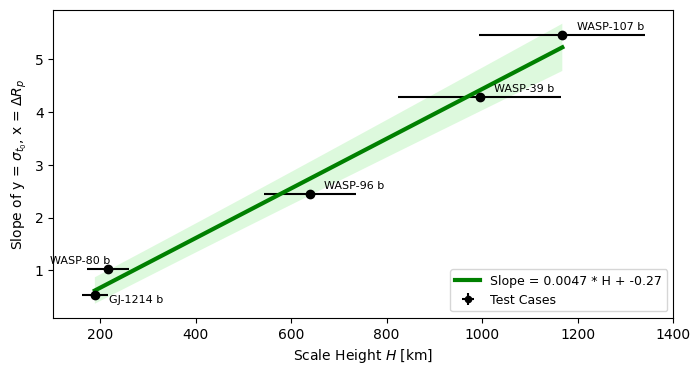

In [20]:
print('Slope (y) vs. H (x) fit:')
print('y = a*x + b')
print('a = %.4f +/- %.4f'%(slopeH1, slopeerrH1))
print('b = %.2f +/- %.2f'%(intcptH1, intcpterrH1))

fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(scaleheights, slopes1, xerr=scaleheight_errs, yerr=slopes1err, marker='o', 
           ls='None', c='black', label='Test Cases')
for i, planet in enumerate(labels):
    if planet=='GJ-1214 b':
        ax.text(scaleheights[i]+30, slopes1[i]-0.15, labels[i], c='black', fontsize=8)
    elif planet=='WASP-80 b':
        ax.text(scaleheights[i]-120, slopes1[i]+0.1, labels[i], c='black', fontsize=8)
    else:
        ax.text(scaleheights[i]+30, slopes1[i]+0.1, labels[i], c='black', fontsize=8)

ax.fill_between(x_plotfit1, (y_plotfit1-y_plotfiterr1), (y_plotfit1+y_plotfiterr1), facecolor='lightgreen', alpha=0.3)
ax.plot(x_plotfit1, y_plotfit1, c='green', lw=3, label='Slope = %.4f * H + %.2f'%(slopeH1, intcptH1))
ax.set(xlabel='Scale Height $H$ [km]', ylabel='Slope of y = $\sigma_{t_0}$, x = $\Delta R_p$')
ax.legend(loc='lower right', markerscale=.75, fontsize=9)
#plt.savefig('analysis_figures/slopeHplot.png', dpi=400, bbox_inches='tight')
plt.show()

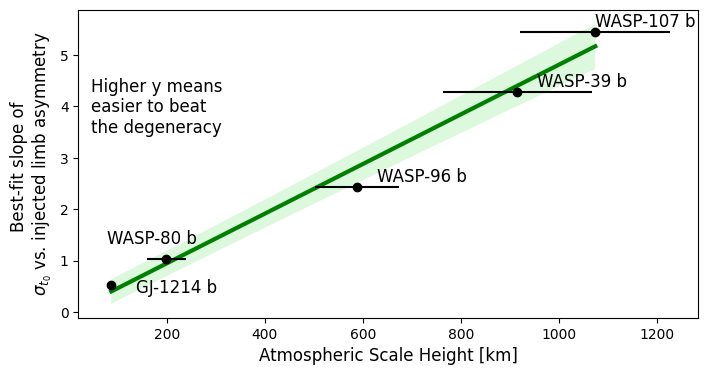

In [21]:
## plot for a poster
fig, ax = plt.subplots(figsize=(8,4))
ax.fill_between(x_plotfit1, (y_plotfit1-y_plotfiterr1), (y_plotfit1+y_plotfiterr1), facecolor='lightgreen', alpha=0.3)
ax.plot(x_plotfit1, y_plotfit1, c='green', lw=3, label='Slope = %.4f * H + %.2f'%(slopeH1, intcptH1))
ax.errorbar(scaleheights, slopes1, xerr=scaleheight_errs, yerr=slopes1err, zorder=5, marker='o', 
           ls='None', c='black', label='Test Cases')
for i, planet in enumerate(labels):
    if planet=='GJ-1214 b':
        ax.text(scaleheights[i]+50, slopes1[i]-0.15, labels[i], c='black', fontsize=12)
    elif planet=='WASP-80 b':
        ax.text(scaleheights[i]-120, slopes1[i]+0.3, labels[i], c='black', fontsize=12)
    elif planet=='WASP-107 b':
        ax.text(scaleheights[i], slopes1[i]+0.1, labels[i], c='black', fontsize=12)
    else:
        ax.text(scaleheights[i]+40, slopes1[i]+0.1, labels[i], c='black', fontsize=12)
ax.text(0.02, 0.6, 'Higher y means \neasier to beat \nthe degeneracy', fontsize=12, transform=ax.transAxes)

ax.set_xlabel('Atmospheric Scale Height [km]', fontsize=12)
ax.set_ylabel('Best-fit slope of \n$\sigma_{t_0}$ vs. injected limb asymmetry', fontsize=12)
#ax.legend(loc='lower right', markerscale=.75, fontsize=12)
plt.savefig('analysis_figures/POSTERslopeHplot.png', dpi=550, bbox_inches='tight')
plt.show()

## Looking at x = t, y = R

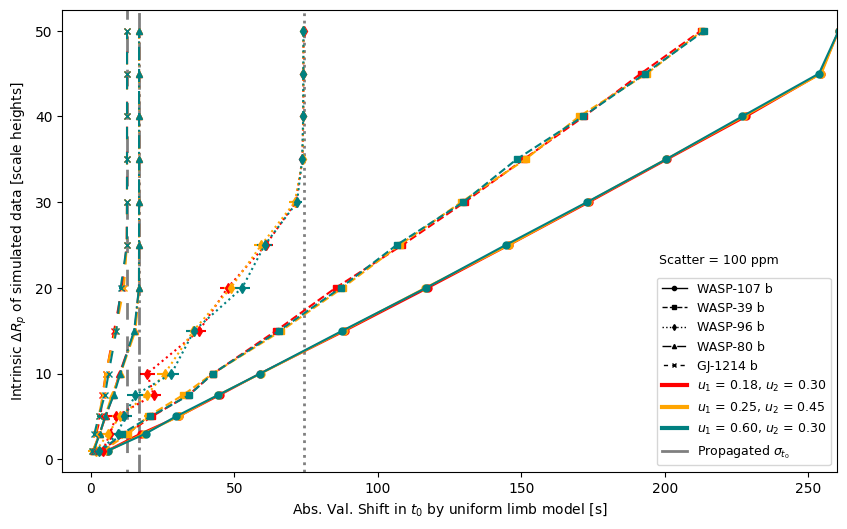

In [9]:
## Plotting the full f_asym vs. t diff data
fig, ax = plt.subplots(figsize=(10,6))

# W-107 b
ax.axvline(propw107, ls='solid', c='black', lw=2, alpha=0.5)
ax.errorbar(abs(tAw107), fAw107, xerr=abs(terrAw107), ls='solid', marker='o', ms=5, c='red')
ax.errorbar(abs(tBw107), fBw107, xerr=abs(terrBw107), ls='solid', marker='o', ms=5, c='orange')
ax.errorbar(abs(tCw107), fCw107, xerr=abs(terrCw107), ls='solid', marker='o', ms=5, c='teal')
# W-39 b
ax.axvline(propw39, ls='--', c='black', lw=2, alpha=0.5)
ax.errorbar(abs(tAw39), fAw39, xerr=abs(terrAw39), ls='--', marker='s', ms=5, c='red')
ax.errorbar(abs(tBw39), fBw39, xerr=abs(terrBw39), ls='--', marker='s', ms=5, c='orange')
ax.errorbar(abs(tCw39), fCw39, xerr=abs(terrCw39), ls='--', marker='s', ms=5, c='teal')
# W-96 b
ax.axvline(propw96, ls='dotted', c='black', lw=2, alpha=0.5)
ax.errorbar(abs(tAw96), fAw96, xerr=abs(terrAw96), ls='dotted', marker='d', ms=5, c='red')
ax.errorbar(abs(tBw96), fBw96, xerr=abs(terrBw96), ls='dotted', marker='d', ms=5, c='orange')
ax.errorbar(abs(tCw96), fCw96, xerr=abs(terrCw96), ls='dotted', marker='d', ms=5, c='teal')
# W-80 b
ax.axvline(propw80, ls='dashdot', c='black', lw=2, alpha=0.5)
ax.errorbar(abs(tAw80), fAw80, xerr=abs(terrAw80), ls='dashdot', marker='^', ms=5, c='red')
ax.errorbar(abs(tBw80), fBw80, xerr=abs(terrBw80), ls='dashdot', marker='^', ms=5, c='orange')
ax.errorbar(abs(tCw80), fCw80, xerr=abs(terrCw80), ls='dashdot', marker='^', ms=5, c='teal')
# gj-1214 b
ax.axvline(propgj1214, ls=(5,(6,6)), c='black', lw=2, alpha=0.5)
ax.errorbar(abs(tAgj1214), fAgj1214, xerr=abs(terrAgj1214), ls=(5,(6,6)), marker='x', ms=5, c='red')
ax.errorbar(abs(tBgj1214), fBgj1214, xerr=abs(terrBgj1214), ls=(5,(6,6)), marker='x', ms=5, c='orange')
ax.errorbar(abs(tCgj1214), fCgj1214, xerr=abs(terrCgj1214), ls=(5,(6,6)), marker='x', ms=5, c='teal')

custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid'), Line2D([0],[0], c='black', lw=2, ls='solid', alpha=0.5)
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C), 'Propagated $\sigma_{t_0}$']
ax.text(0.77, 0.45, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)
ax.set(xlim=(-10, 260))
#ax.set(xlim=(0, 25))
ax.set(ylabel=r'Intrinsic $\Delta R_p$ of simulated data [scale heights]', xlabel=r'Abs. Val. Shift in $t_0$ by uniform limb model [s]')
ax.legend(custom_legend_lines, custom_legend_labels, loc='lower right', markerscale=.5, fontsize=9)

plt.show()

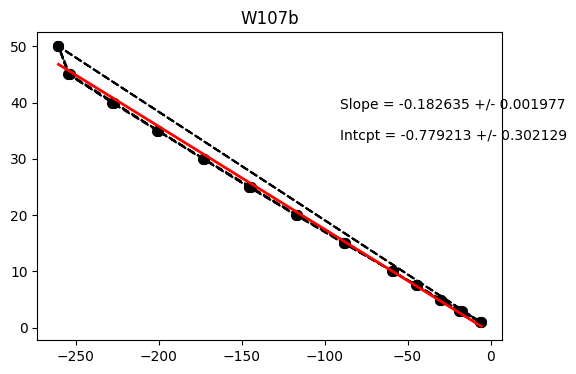

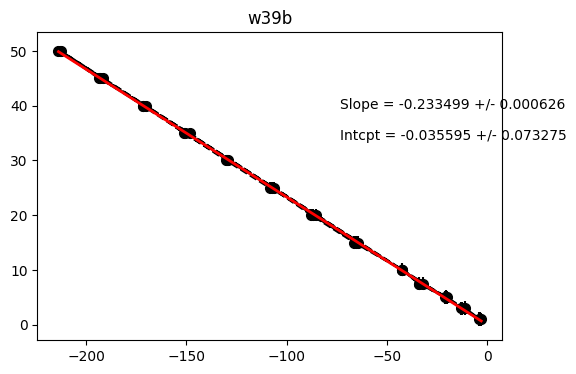

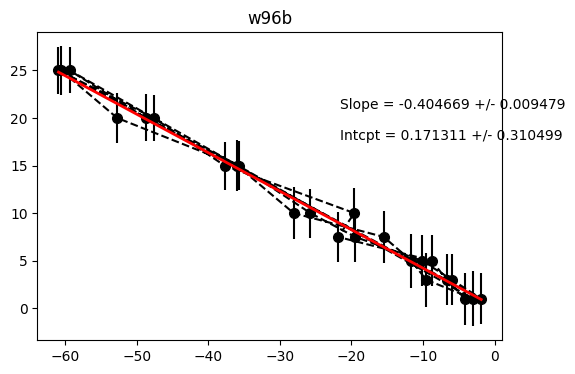

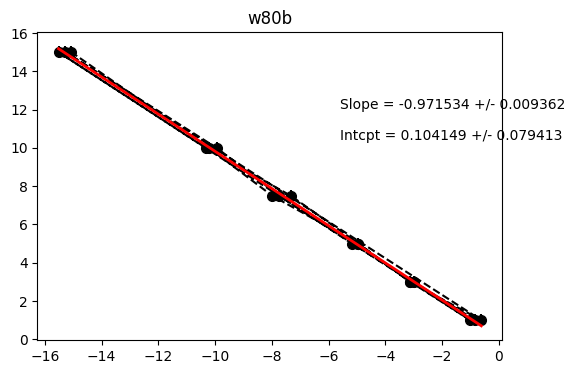

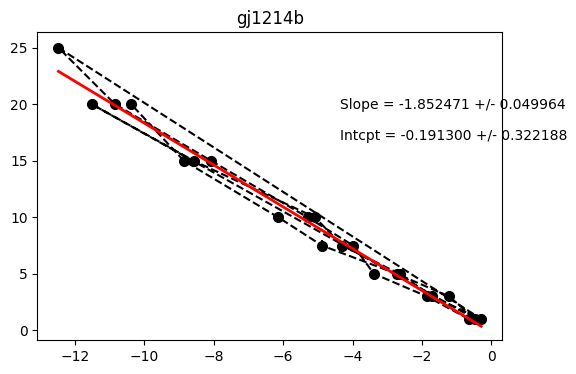

In [10]:
# Fitting each planet's combined line family
idxs2_w107 = np.where(abs(tw107) <= propw107)
slope2_w107, intcpt2_w107, slope2err_w107, intcpt2err_w107 = line_fit((tw107[idxs2_w107]), fw107[idxs2_w107])
check_fit((tw107[idxs2_w107]), fw107[idxs2_w107], terrw107[idxs2_w107], -99, 'W107b')

idxs2_w39 = np.where(abs(tw39) <= propw39)
slope2_w39, intcpt2_w39, slope2err_w39, intcpt2err_w39 = line_fit((tw39[idxs2_w39]), fw39[idxs2_w39])
check_fit((tw39[idxs2_w39]), fw39[idxs2_w39], terrw39[idxs2_w39], -99, 'w39b')

idxs2_w96 = np.where(abs(tw96) <= propw96-10)
slope2_w96, intcpt2_w96, slope2err_w96, intcpt2err_w96 = line_fit((tw96[idxs2_w96]), fw96[idxs2_w96])
check_fit((tw96[idxs2_w96]), fw96[idxs2_w96], terrw96[idxs2_w96], -99, 'w96b')

idxs2_w80 = np.where(abs(tw80) <= propw80-0.1)
slope2_w80, intcpt2_w80, slope2err_w80, intcpt2err_w80 = line_fit((tw80[idxs2_w80]), fw80[idxs2_w80])
check_fit((tw80[idxs2_w80]), fw80[idxs2_w80], terrw80[idxs2_w80], -99, 'w80b')

idxs2_gj1214 = np.where(abs(tgj1214) <= propgj1214-0.1)
slope2_gj1214, intcpt2_gj1214, slope2err_gj1214, intcpt2err_gj1214 = line_fit((tgj1214[idxs2_gj1214]), fgj1214[idxs2_gj1214])
check_fit((tgj1214[idxs2_gj1214]), fgj1214[idxs2_gj1214], terrgj1214[idxs2_gj1214], -99, 'gj1214b')

slopes2 = np.array([slope2_gj1214, slope2_w80, slope2_w96, slope2_w39, slope2_w107])
slopes2err = np.array([slope2err_gj1214, slope2err_w80, slope2err_w96, slope2err_w39, slope2err_w107])

In [11]:
def fitfunc_invx(x, a, b):
    y = a/x + b
    return y

In [13]:
popt2, pcov2 = curve_fit(fitfunc_invx, scaleheights, slopes2, p0=[-1, 0], )
perr2 = np.sqrt(np.diag(pcov2))
#slopeH2, intcptH2, slopeerrH2, intcpterrH2 = line_fit(scaleheights, slopes2)

x_plotfit2 = np.linspace(min(scaleheights), max(scaleheights), 20)
#y_plotfit2 = slopeH2*x_plotfit2 + intcptH2
y_plotfit2 = popt2[0]/x_plotfit2 + popt2[1]

y_plotfiterr2 = np.zeros(len(y_plotfit2))
for i_x, x in enumerate(x_plotfit2):
    xerr = 0.
    varterm1 = perr2[0]**2 / x**2
    varterm2 = (popt2[0]**2 * xerr**2)/(x**4)
    varterm3 = perr2[1]**2
    yvariance = varterm1 + varterm2 + varterm3
    y_plotfiterr2[i_x] = np.sqrt(yvariance)

Slope (y2) vs. H (x) fit:
y2 = a/x + b
a = -156 +/- 8
b = -0.10 +/- 0.05


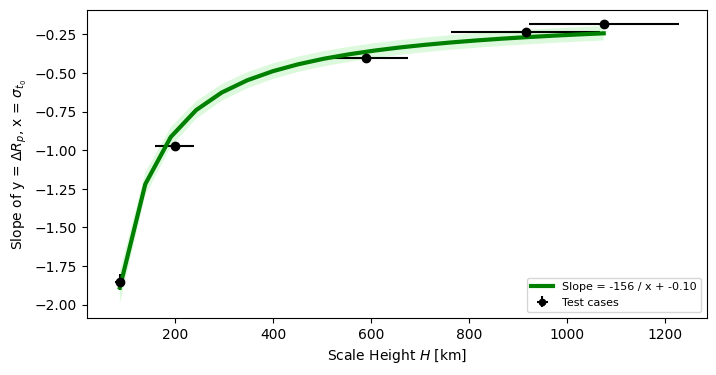

In [14]:
print('Slope (y2) vs. H (x) fit:')
print('y2 = a/x + b')
print('a = %.0f +/- %.0f'%(popt2[0], perr2[0]))
print('b = %.2f +/- %.2f'%(popt2[1], perr2[1]))

fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(scaleheights, slopes2, xerr=scaleheight_errs, yerr=slopes2err, marker='o', 
           ls='None', c='black', label='Test cases')

ax.fill_between(x_plotfit2, (y_plotfit2-y_plotfiterr2), (y_plotfit2+y_plotfiterr2), facecolor='lightgreen', alpha=0.3)
ax.plot(x_plotfit2, y_plotfit2, c='green', lw=3, label='Slope = %.0f / x + %.2f'%(popt2[0], popt2[1]))
ax.set(xlabel='Scale Height $H$ [km]', ylabel='Slope of y = $\Delta R_p$, x = $\sigma_{t_0}$')
ax.legend(loc='lower right', fontsize=8, markerscale=0.75)
plt.show()